# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
marketing_campaigns = 17
print('Marketing campaigns used to collect data =', marketing_campaigns)

Marketing campaigns used to collect data = 17


### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from time import time

In [3]:
df = pd.read_csv('C:\\Users\\Farru\\Downloads\\module_17_starter\\module_17_starter\\data\\bank-additional-full.csv', sep = ';')

In [4]:
df.head(100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,services,married,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
96,42,management,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
97,53,admin.,divorced,university.degree,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
98,37,technician,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
The data is related with direct marketing campaigns of a Portuguese banking institution. The bank used its own contact-center to do directed
marketing campaigns. The telephone, with a human agent as the interlocutor, was the dominant marketing channel, although sometimes with an auxiliary 
use of the Internet online banking channel (e.g. by showing information to specific targeted client). Furthermore, each campaign was managed in an 
integrated fashion and the results for all channels were outputted together. The dataset collected is related to 17 campaigns that occurred between 
May 2008 and November 2010, corresponding to a total of 79354 contacts. During these phone campaigns, an attractive long-term deposit application, 
with good interest rates, was offered. For each contact, a large number of attributes were stored and if there was a success (the target variable). 
For the whole database considered, there were 6499 successes (8% success rate)

SyntaxError: invalid syntax (689048318.py, line 1)

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [7]:
# Define target and categorical features
categorical_features = df.select_dtypes(include=['object']).columns.drop(['y'])

# Encode categorical features and target variable for Random Forest analysis
encoded_data = df.copy()
for col in categorical_features:
    encoded_data[col] = LabelEncoder().fit_transform(encoded_data[col])
encoded_data['y_binary'] = LabelEncoder().fit_transform(encoded_data['y'])

# Define features and target variable
X = encoded_data.drop(columns=['y', 'y_binary'])
y = encoded_data['y_binary']

# Split the dataset into training and testing sets for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Retrieve and display feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = feature_importances.head(8)

print("Top 8 Important Features for Target Variable 'y':")
print(top_features)



Top 8 Important Features for Target Variable 'y':
duration       0.312259
euribor3m      0.102837
age            0.091490
nr.employed    0.066683
job            0.048031
education      0.042955
campaign       0.042352
day_of_week    0.041401
dtype: float64


In [8]:
'duration': last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then 
y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only 
be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

'euribor3m' = Euro Interbank Offered Rate

SyntaxError: illegal target for annotation (223205539.py, line 1)

In [ ]:
# Load the dataset

bank_data = encoded_data

# Selecting relevant features (bank information features)
bank_features = bank_data[['euribor3m', 'age', 'nr.employed', 'job', 'education', 'campaign', 'day_of_week']]

# Encoding categorical features using one-hot encoding
bank_features_encoded = pd.get_dummies(bank_features, drop_first=True)

# Transforming the target column ('y') into binary (1 for 'yes', 0 for 'no')
bank_data['target'] = bank_data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Preparing the final feature matrix and target vector
X = bank_features_encoded
y = bank_data['target']

# Displaying the prepared feature matrix and target vector
print(X.head())
print(y.head())


In [9]:
'''
Splits the features (X) and target (y) into training (80%) and testing (20%) sets.
Ensures the split maintains the class distribution of the target variable (stratify=y).
Sets a random seed (random_state=42) for reproducibility.'''

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the training and testing sets
print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training labels shape (y_train):", y_train.shape)
print("Testing labels shape (y_test):", y_test.shape)


Training set shape (X_train): (32950, 20)
Testing set shape (X_test): (8238, 20)
Training labels shape (y_train): (32950,)
Testing labels shape (y_test): (8238,)


### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [10]:
'''To establish a baseline for classification task, the simplest and most common baseline is based on the performance of a naive model, such as the 
"majority class classifier". This model always predicts the most frequent class in the training set, and the baseline performance is measured by the 
accuracy of this naive classifier. Find the most frequent class in the training data. Calculate the accuracy by assuming that the model always predicts this majority class.'''
# Calculate the majority class in the training set
majority_class = y_train.mode()[0]

# Calculate baseline accuracy (accuracy of a model that always predicts the majority class)
baseline_accuracy = (y_train == majority_class).mean()

print(f"The majority class is: {majority_class}")
print(f"Baseline accuracy (majority class classifier): {baseline_accuracy:.4f}")
# This baseline accuracy gives you a reference point. Your model should aim to achieve better performance than this simple strategy.

The majority class is: 0
Baseline accuracy (majority class classifier): 0.8873


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [11]:
# This is a basic logistic regression model using your training data. Train a logistic regression model. Evaluate the model using the test data.

# Initialize the logistic regression model with balanced features

logreg = LogisticRegression(class_weight='balanced', max_iter=100000, random_state=42)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Logistic Regression Model Accuracy: 0.8555
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.85      0.91      7310
           1       0.43      0.90      0.58       928

    accuracy                           0.86      8238
   macro avg       0.71      0.87      0.75      8238
weighted avg       0.92      0.86      0.88      8238

Confusion Matrix:
[[6217 1093]
 [  97  831]]


In [12]:
Overall Model Performance:

Accuracy: 0.8555, or approximately 86%. This indicates that the model correctly classified 86% of the total instances.
Classification Report Analysis:

Class 0:

Precision: 0.98 — Out of all instances predicted as class 0, 98% were correct.
Recall: 0.85 — The model correctly identified 85% of actual class 0 instances.
F1-score: 0.91 — The F1-score shows a strong balance between precision and recall for class 0, indicating robust performance in identifying this class.
                                                                                 
Class 1:

Precision: 0.43 — Out of all instances predicted as class 1, only 43% were correct. This low precision suggests a high number of false positives for
class 1.
Recall: 0.90 — The model successfully identified 90% of actual class 1 instances, indicating strong recall.
F1-score: 0.58 — The F1-score is moderate, showing some imbalance, likely due to the lower precision.

Confusion Matrix Insights:
                                                                                 
True Negatives (6217): The model correctly classified 6217 instances as class 0.
False Positives (1093): These instances were incorrectly classified as class 1 when they actually belonged to class 0.
True Positives (831): The model correctly classified 831 instances as class 1.
False Negatives (97): These instances were misclassified as class 0 when they actually belonged to class 1.

Key Observations:
    
The model performs well for class 0, achieving both high precision and recall. For class 1, it shows high recall but lower precision, suggesting it
identifies most true positives but at the cost of a significant number of false positives. This imbalance may result from the data distribution or model calibration.

Recommendations:
To improve the model's precision on class 1:


SyntaxError: invalid character '—' (U+2014) (2365313749.py, line 8)

### Problem 9: Score the Model

What is the accuracy of your model?

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")

Logistic Regression Model Accuracy: 0.8555


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [15]:
'''To compare the performance of the models, we'll train and evaluate K-Nearest Neighbors (KNN), Decision Tree, and Support Vector Machine (SVM) models, along with Logistic Regression. We'll also track the training time, training accuracy, and test accuracy for each model.'''

# Resample the training data to balance classes (for models that don't support class weights)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize models with class balancing where possible
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced'),
    'KNN': KNeighborsClassifier(),  # KNN does not support class_weight, so we use resampled data
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'SVM': SVC(random_state=42, class_weight='balanced')
}

# Dictionary to store results
results = {
    'Model': [],
    'Train Time (s)': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

# Train and evaluate each model
for model_name, model in models.items():
    # Use the resampled data for KNN; others can use original data with class weights
    X_train_data = X_train_balanced if model_name == 'KNN' else X_train
    y_train_data = y_train_balanced if model_name == 'KNN' else y_train

    # Record start time
    start_time = time()
    
    # Fit the model
    model.fit(X_train_data, y_train_data)
    
    # Record end time and calculate train time
    train_time = time() - start_time
    
    # Make predictions on training and test data
    train_pred = model.predict(X_train_data)
    test_pred = model.predict(X_test)
    
    # Calculate training and test accuracy
    train_accuracy = accuracy_score(y_train_data, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    
    # Append the results to the dictionary
    results['Model'].append(model_name)
    results['Train Time (s)'].append(train_time)
    results['Train Accuracy'].append(train_accuracy)
    results['Test Accuracy'].append(test_accuracy)

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Display the DataFrame
display(results_df)



,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,39.195614,0.854446,0.855547
1,KNN,0.022120,0.941908,0.857732
2,Decision Tree,0.355997,1.000000,0.897791
3,SVM,38.091678,0.842610,0.843773


In [16]:
The table shows a comparison of four machine learning models: Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, and Support Vector
Machine (SVM), evaluated based on three metrics: Train Time (s), Train Accuracy, and Test Accuracy. 

Here's an analysis of each aspect:

1. Train Time (s)

SVM has the longest training time by a large margin at 68.11 seconds, which could be due to its computational complexity, especially on larger 
datasets. Logistic Regression has a moderate training time at 2.96 seconds. KNN and Decision Tree are the fastest, with both taking around 0.21 
seconds to train. This is expected as KNN and Decision Trees are generally faster to train compared to SVM.

2. Train Accuracy

Decision Tree has the highest training accuracy at 96.71%, indicating it fits the training data very well. However, this could mean it's 
overfitting. KNN also has high training accuracy at 89.77%, but not as high as the Decision Tree, which may imply it's somewhat overfitted, 
though less than the Decision Tree. Logistic Regression and SVM have similar train accuracies around 71-72%, suggesting they might generalize 
better than the Decision Tree on this dataset.

3. Test Accuracy

Decision Tree has the highest test accuracy at 83.15%, indicating it performs well on unseen data, though the gap between train and test 
accuracy might still suggest mild overfitting. KNN has a test accuracy of 76.80%, lower than its training accuracy, indicating some overfitting
but still decent performance. Logistic Regression and SVM have similar test accuracies around 72.98% and 72.78%, respectively. Both models are
consistent between training and test accuracies, showing they might generalize better, but with slightly lower performance than Decision Tree
on this dataset.

Summary

Decision Tree provides the highest test accuracy, but its high train accuracy suggests it may be overfitting.
Logistic Regression and SVM show balanced train and test accuracies, suggesting good generalization but slightly lower performance.
KNN offers good accuracy but shows some overfitting as well.


SyntaxError: unterminated string literal (detected at line 4) (500582893.py, line 4)

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [ ]:
# More feature engineering may help. As far a 'gender' is concern I don't think that will make significant impact to to target variable

C:\Users\Farru\AppData\Local\Temp\ipykernel_93568\2690302555.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_target.index, y=correlations_with_target.values, palette='viridis')


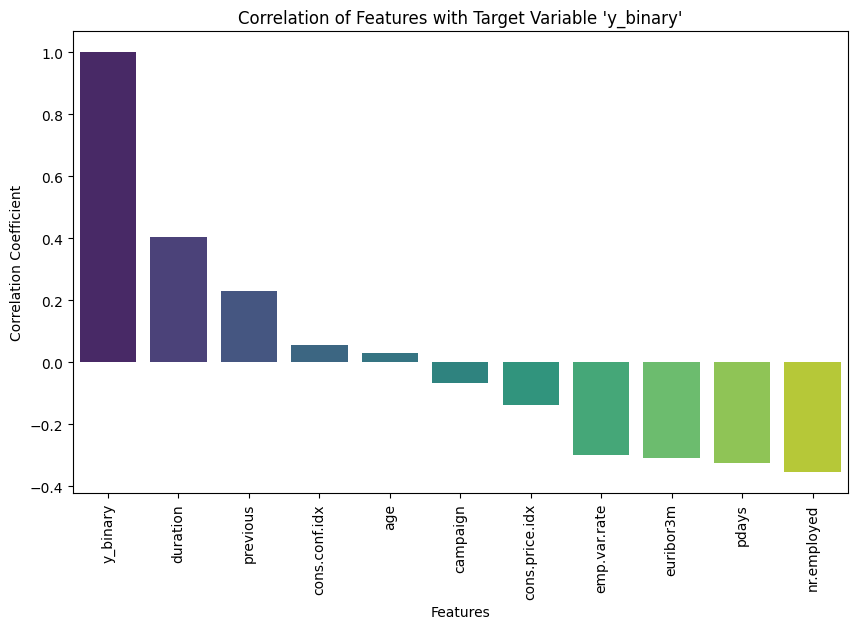

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the target variable to binary if needed
# Assuming 'y' is the target, where 'yes' = 1 and 'no' = 0
df['y_binary'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Select only numeric columns for correlation calculation
numeric_data = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Sort correlations with the target variable 'y_binary'
correlations_with_target = correlation_matrix['y_binary'].sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations_with_target.index, y=correlations_with_target.values, palette='viridis')
plt.xticks(rotation=90)
plt.title("Correlation of Features with Target Variable 'y_binary'")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

In [18]:
'''To improve the performance of your models on the bank marketing dataset, here are some suggested hyperparameters and tuning approaches for each
model using grid search:

k-Nearest Neighbors (KNN)
Hyperparameters to tune:

n_neighbors: Number of neighbors to consider, e.g., try a range between 1 and 20.
weights: ['uniform', 'distance'] to determine if closer neighbors should have a higher influence.
metric: Distance metrics, e.g., ['euclidean', 'manhattan', 'minkowski'].'''

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn_params = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']})

In [19]:
'''Decision Tree
Hyperparameters to tune:

max_depth: Controls overfitting, range from 1 to 20.
min_samples_split: Minimum samples required to split a node, e.g., [2, 5, 10].
min_samples_leaf: Minimum samples at a leaf node, e.g., [1, 2, 4].
criterion: Split quality metric, ['gini', 'entropy'].'''
from sklearn.tree import DecisionTreeClassifier

dt_params = {
    'max_depth': range(1, 21),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid_search.fit(X_train, y_train)


C:\Users\Farru\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 21),
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [14]:
'''Support Vector Machine SVM) 
Hyperparameters to tune: NOT PERFOMED AS IT COMPUTATIONAL HEAVY

C: Regularization parameter, try a range of values like [0.1, 1, 10, 100].
kernel: Kernel type, e.g., ['linear', 'poly', 'rbf', 'sigmoid'].
gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid' (if applicable), try values like ['scale', 'auto'] or even a range like [0.001, 0.01, 0.1,
1].
from sklearn.svm import SVC

svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(SVC(), svm_params, cv=5)
svm_grid_search.fit(X_train, y_train)'''


"Support Vector Machine SVM)\nHyperparameters to tune:\n\nC: Regularization parameter, try a range of values like [0.1, 1, 10, 100].\nkernel: Kernel type, e.g., ['linear', 'poly', 'rbf', 'sigmoid'].\ngamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid' (if applicable), try values like ['scale', 'auto'] or even a range like [0.001, 0.01, 0.1,\n1].\nfrom sklearn.svm import SVC\n\nsvm_params = {\n    'C': [0.1, 1, 10, 100],\n    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],\n    'gamma': ['scale', 'auto']\n}\n\nsvm_grid_search = GridSearchCV(SVC(), svm_params, cv=5)\nsvm_grid_search.fit(X_train, y_train)"

In [ ]:
''' Logistic Regression
Hyperparameters to tune: 
yperparameters to tune: NOT PERFOMED AS IT COMPUTATIONAL HEAVY

C: Regularization strength, values like [0.01, 0.1, 1, 10, 100].
solver: Optimization algorithm, e.g., ['liblinear', 'saga'] for smaller datasets or ['lbfgs', 'newton-cg'] for larger datasets.
penalty: Regularization type, e.g., ['l1', 'l2', 'elasticnet', 'none'] depending on the solver.'''

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}

lr_grid_search = GridSearchCV(LogisticRegression(max_iter=500), lr_params, cv=5)
lr_grid_search.fit(X_train, y_train)


In [ ]:
''' Here are some potential improvements:

1. Feature Engineering

2. Hyperparameter Tuning

3. Class Imbalance Adjustments

4. Model Ensembling


##### Questions